# Opinion Poll Visualization
Ugur Yavuz, September 2020

This notebook is a walk-through of how to visualize election opinion polls on Wikipedia with scatter plots and LOWESS curves on Python.

In [1]:
import pandas as pd
import numpy as np
import matplotlib                
import matplotlib.pyplot as plt  
import seaborn as sns
import re

In [2]:
# Increase matplotlib DPI
matplotlib.rcParams['figure.dpi'] = 300

## Turkey

In [3]:
# Read table from Wikipedia
df = pd.read_html('https://en.wikipedia.org/wiki/Opinion_polling_for_the_2023_Turkish_general_election')[2]
df.columns = [elt[0] for elt in df.columns] # Fix column names
df

,Date,Polling firm,AKP,CHP,HDP,İYİ,MHP,DEVA,GP,SP,Others,Lead
0,Aug 2020,AKAM,36.9,28.1,10.6,11.4,7.1,2.7,2.6,0.4,0.2,8.8
1,Aug 2020,AREA,38.0,22.7,10.8,11.5,10.8,1.7,1.3,1.8,1.3,15.3
2,Aug 2020,Metropoll,42.1,26.0,10.1,8.7,7.6,1.6,2.5,1.0,0.3,16.1
3,Aug 2020,SONAR,39.8,27.2,8.3,10.4,11.3,-,-,-,3.0,10.6
4,Aug 2020,Aksoy,38.3,26.2,9.6,9.2,8.5,3.4,2.5,1.2,1.1,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...
80,Dec 2018,AREA,38.8,25.0,10.8,12.2,11.2,NaN,NaN,-,2.0,12.2
81,Nov 2018,AREA,40.2,25.1,10.7,9.5,13.0,NaN,NaN,-,1.9,15.1
82,14–19 Jul 2018,MAK,45.5,22.9,10.9,7.6,10.9,NaN,NaN,1.1,1.1,22.6
83,11 Jul 2018,ORC,44.7,24.7,8.9,8.3,12.3,NaN,NaN,-,1.1,20.0


In [4]:
# Cast dates into datetime format, use the 15th of the month if no days are specified.
df.Date = [pd.to_datetime(' '.join(['15', *date.split(' ')]) if len(date) == 8 else ' '.join(re.split('–| |-', date)[-3:])) for date in df.Date]

In [5]:
# Display entire table
pd.set_option('max_rows', None)
df

,Date,Polling firm,AKP,CHP,HDP,İYİ,MHP,DEVA,GP,SP,Others,Lead
0,2020-08-15,AKAM,36.9,28.1,10.6,11.4,7.1,2.7,2.6,0.4,0.2,8.8
1,2020-08-15,AREA,38.0,22.7,10.8,11.5,10.8,1.7,1.3,1.8,1.3,15.3
2,2020-08-15,Metropoll,42.1,26.0,10.1,8.7,7.6,1.6,2.5,1.0,0.3,16.1
3,2020-08-15,SONAR,39.8,27.2,8.3,10.4,11.3,-,-,-,3.0,10.6
4,2020-08-15,Aksoy,38.3,26.2,9.6,9.2,8.5,3.4,2.5,1.2,1.1,12.1
5,2020-08-15,ORC,36.6,25.9,9.6,8.1,14.1,2.3,1.6,0.8,1.0,10.7
6,2020-08-15,İEA,39.1,22.6,10.8,10.7,11.4,2.3,1.1,1.2,0.8,16.5
7,2020-08-15,ArtıBir,36.9,27.3,11.7,11.0,8.9,1.9,1.3,1.1,-,9.6
8,2020-07-15,AKAM,35.0,28.4,11.7,12.4,7.4,2.2,2.3,-,0.6,6.6
9,2020-07-15,ORC,37.3,26.2,10.4,6.8,13.0,2.6,1.7,1.1,0.9,11.1


In [6]:
# Cast all '-' into NaN
df.replace({'-': np.nan}, inplace=True)
pd.reset_option('max_rows')
df

,Date,Polling firm,AKP,CHP,HDP,İYİ,MHP,DEVA,GP,SP,Others,Lead
0,2020-08-15,AKAM,36.9,28.1,10.6,11.4,7.1,2.7,2.6,0.4,0.2,8.8
1,2020-08-15,AREA,38.0,22.7,10.8,11.5,10.8,1.7,1.3,1.8,1.3,15.3
2,2020-08-15,Metropoll,42.1,26.0,10.1,8.7,7.6,1.6,2.5,1.0,0.3,16.1
3,2020-08-15,SONAR,39.8,27.2,8.3,10.4,11.3,NaN,NaN,NaN,3.0,10.6
4,2020-08-15,Aksoy,38.3,26.2,9.6,9.2,8.5,3.4,2.5,1.2,1.1,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...
80,2018-12-15,AREA,38.8,25.0,10.8,12.2,11.2,NaN,NaN,NaN,2.0,12.2
81,2018-11-15,AREA,40.2,25.1,10.7,9.5,13.0,NaN,NaN,NaN,1.9,15.1
82,2018-07-19,MAK,45.5,22.9,10.9,7.6,10.9,NaN,NaN,1.1,1.1,22.6
83,2018-07-11,ORC,44.7,24.7,8.9,8.3,12.3,NaN,NaN,NaN,1.1,20.0


In [7]:
# Check data types
df.dtypes

Date            datetime64[ns]
Polling firm            object
AKP                    float64
CHP                    float64
HDP                     object
İYİ                    float64
MHP                    float64
DEVA                    object
GP                      object
SP                      object
Others                  object
Lead                   float64
dtype: object

In [8]:
# Cast non-float columns to float
df[['HDP', 'DEVA', 'GP', 'SP', 'Others']] = df[['HDP', 'DEVA', 'GP', 'SP', 'Others']].apply(pd.to_numeric)
df.dtypes

Date            datetime64[ns]
Polling firm            object
AKP                    float64
CHP                    float64
HDP                    float64
İYİ                    float64
MHP                    float64
DEVA                   float64
GP                     float64
SP                     float64
Others                 float64
Lead                   float64
dtype: object

In [9]:
df

,Date,Polling firm,AKP,CHP,HDP,İYİ,MHP,DEVA,GP,SP,Others,Lead
0,2020-08-15,AKAM,36.9,28.1,10.6,11.4,7.1,2.7,2.6,0.4,0.2,8.8
1,2020-08-15,AREA,38.0,22.7,10.8,11.5,10.8,1.7,1.3,1.8,1.3,15.3
2,2020-08-15,Metropoll,42.1,26.0,10.1,8.7,7.6,1.6,2.5,1.0,0.3,16.1
3,2020-08-15,SONAR,39.8,27.2,8.3,10.4,11.3,NaN,NaN,NaN,3.0,10.6
4,2020-08-15,Aksoy,38.3,26.2,9.6,9.2,8.5,3.4,2.5,1.2,1.1,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...
80,2018-12-15,AREA,38.8,25.0,10.8,12.2,11.2,NaN,NaN,NaN,2.0,12.2
81,2018-11-15,AREA,40.2,25.1,10.7,9.5,13.0,NaN,NaN,NaN,1.9,15.1
82,2018-07-19,MAK,45.5,22.9,10.9,7.6,10.9,NaN,NaN,1.1,1.1,22.6
83,2018-07-11,ORC,44.7,24.7,8.9,8.3,12.3,NaN,NaN,NaN,1.1,20.0


In [10]:
# Assign Wikipedia standard colors to each party, in table order
colors = ['#ff7f00', '#d40000', '#951b88', '#40b4e5', '#870000', '#0a6da7', '#04564a', '#ff5f5f', '#d9d9da']

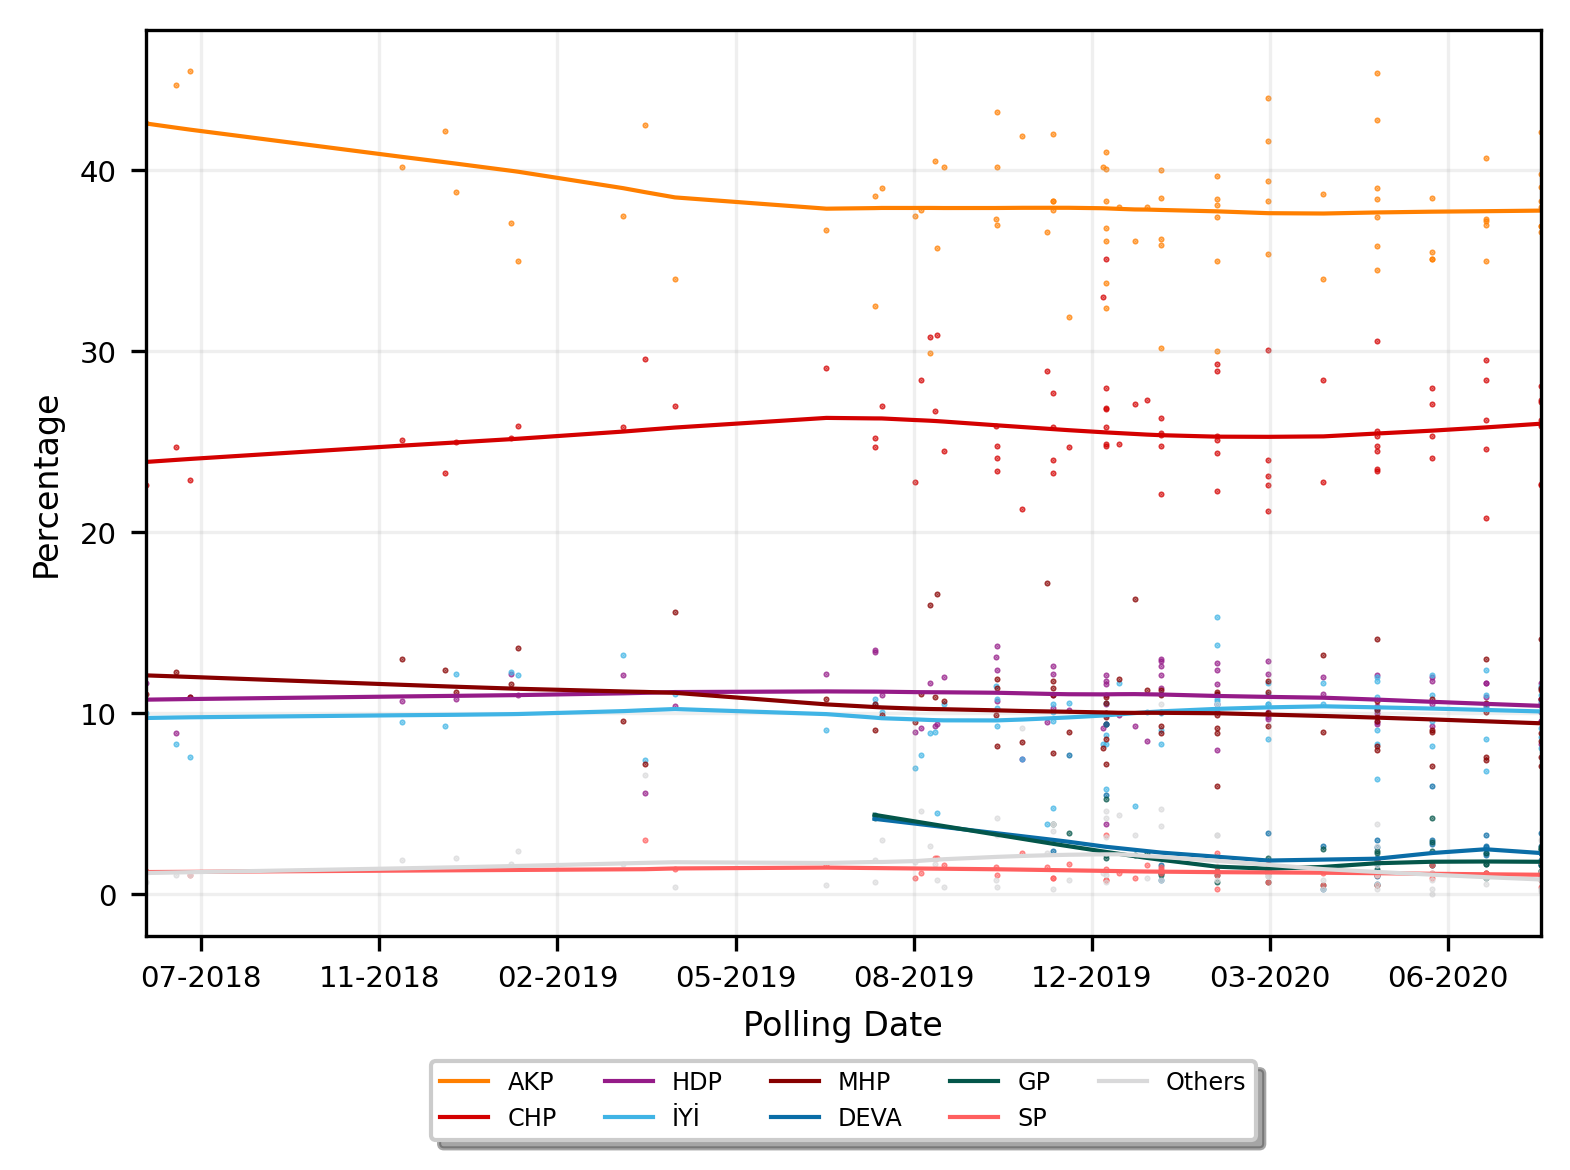

In [11]:
# Add subplot
ax1 = plt.figure().add_subplot()

# Draw scatter plots and LOWESS curves
for col, color in zip(df.columns[2:-1], colors):
    sns.regplot(df['Date'].apply(matplotlib.dates.date2num), df[col], 
                scatter_kws={'s': 0.2, 'color': color}, 
                line_kws={'color': color, 'alpha': 1, 'lw': 1, 'label': col}, 
                lowess=True)

# Name labels and format ticks    
plt.xlabel('Polling Date', fontsize=8); plt.xticks(fontsize=7)
plt.ylabel('Percentage', fontsize=8); plt.yticks(fontsize=7)
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m-%Y'))

# Add grid
ax1.grid(alpha=0.2)

# Add legend
box = ax1.get_position()
ax1.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height])
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), fancybox=True, 
           shadow=True, ncol=5, fontsize=5.75)

# Save figure
plt.savefig('TR-1.svg')

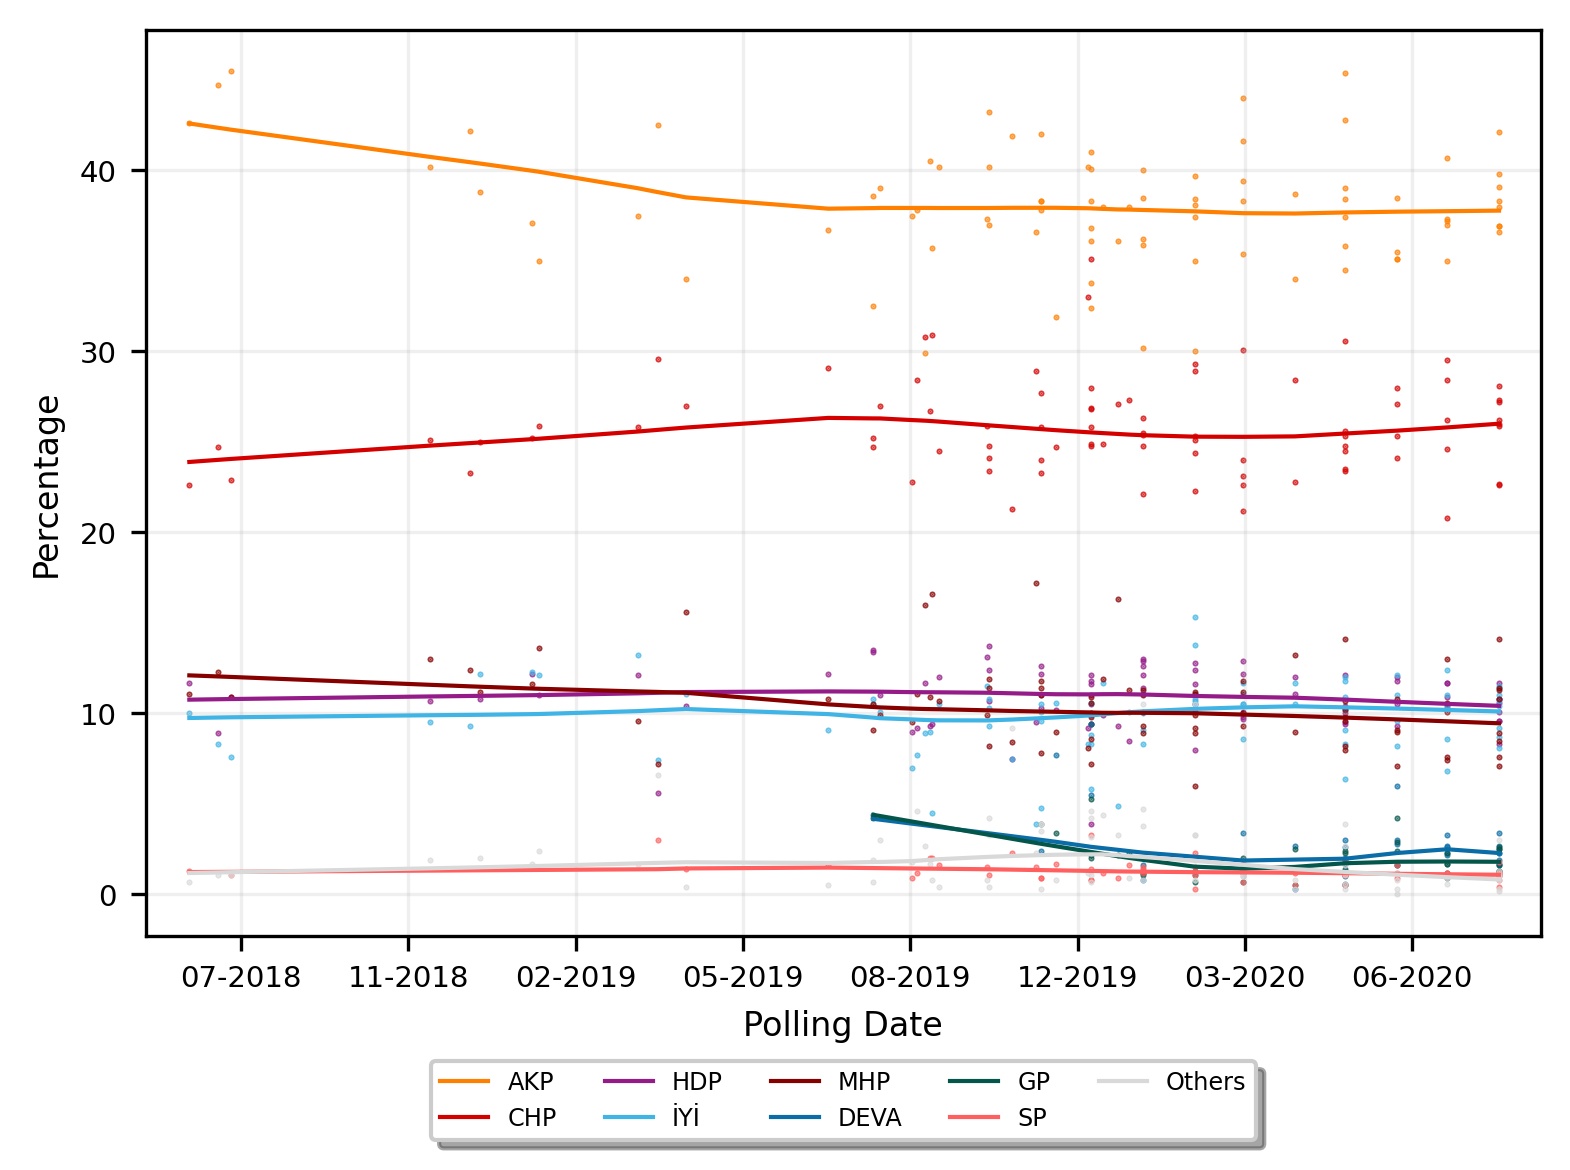

In [12]:
# Add subplot
ax1 = plt.figure().add_subplot()

# Draw scatter plots and LOWESS curves
for col, color in zip(df.columns[2:-1], colors):
    sns.regplot(df['Date'].apply(matplotlib.dates.date2num), df[col], 
                scatter_kws={'s': 0.2, 'color': color}, 
                line_kws={'color': color, 'alpha': 1, 'lw': 1, 'label': col}, 
                lowess=True)

# Name labels and format ticks    
plt.xlabel('Polling Date', fontsize=8); plt.xticks(fontsize=7)
plt.ylabel('Percentage', fontsize=8); plt.yticks(fontsize=7)
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m-%Y'))

# Extend x-limits for some breathing space
ax1.set_xlim(matplotlib.dates.datestr2num('29-05-2018'), matplotlib.dates.datestr2num('09-09-2020'))

# Add grid
ax1.grid(alpha=0.2)

# Add legend
box = ax1.get_position()
ax1.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height])
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), fancybox=True, 
           shadow=True, ncol=5, fontsize=5.75)

# Save figure
plt.savefig('TR-2.svg')

# Lithuania

In [13]:
df2 = pd.read_html('https://en.wikipedia.org/wiki/2020_Lithuanian_parliamentary_election')[5]
df2.columns = [elt[0] for elt in df2.columns] # Fix column names
df2

,Polling Firm/Link,Last dateof polling,TS-LKD,LVŽS,LSDP,LSDDP,TT,LRLS,LLRA,LCP,DP,Laisves
0,Spinter tyrimai,16–26 July 2020,22.80,22.10,13.90,NaN,NaN,8.80,4.70,3.40,7.50,5.7
1,Vilmorus,10–18 July 2020,25.30,25.80,10.40,4.60,NaN,6.90,3.20,2.30,9.10,2.3
2,Spinter tyrimai,18–26 June 2020,25.20,19.80,13.50,NaN,NaN,7.70,5.70,NaN,8.00,6.1
3,Baltijos tyrimai,15–25 June 2020,18.20,22.50,17.00,2.90,NaN,8.80,6.60,1.90,8.40,3.7
4,Vilmorus,5–13 June 2020,24.90,23.30,15.90,3.70,5.40,7.50,3.80,3.00,8.00,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...
73,Baltijos tyrimai,13–26 June 2017,13.00,14.00,13.00,13.00,7.00,7.00,6.00,3.00,4.00,NaN
74,RAIT,10–26 March 2017,10.00,26.00,NaN,NaN,3.00,9.00,2.00,NaN,NaN,NaN
75,RAIT,9–26 February 2017,14.00,29.00,9.00,9.00,5.00,7.00,NaN,NaN,NaN,NaN
76,Spinter tyrimai,December 2016,12.00,30.70,8.90,8.90,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Fix election date
df2.loc[len(df2)-1, 'Last dateof polling'] = '23 October 2016'

In [15]:
# Assign percentages shared between LSDP and LSDDP to LDSP only, prior to April 2018 split
df2.loc[len(df2)-25:, 'LSDDP'] = [np.nan] * 25

In [16]:
df2

,Polling Firm/Link,Last dateof polling,TS-LKD,LVŽS,LSDP,LSDDP,TT,LRLS,LLRA,LCP,DP,Laisves
0,Spinter tyrimai,16–26 July 2020,22.80,22.10,13.90,NaN,NaN,8.80,4.70,3.40,7.50,5.7
1,Vilmorus,10–18 July 2020,25.30,25.80,10.40,4.6,NaN,6.90,3.20,2.30,9.10,2.3
2,Spinter tyrimai,18–26 June 2020,25.20,19.80,13.50,NaN,NaN,7.70,5.70,NaN,8.00,6.1
3,Baltijos tyrimai,15–25 June 2020,18.20,22.50,17.00,2.9,NaN,8.80,6.60,1.90,8.40,3.7
4,Vilmorus,5–13 June 2020,24.90,23.30,15.90,3.7,5.40,7.50,3.80,3.00,8.00,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...
73,Baltijos tyrimai,13–26 June 2017,13.00,14.00,13.00,NaN,7.00,7.00,6.00,3.00,4.00,NaN
74,RAIT,10–26 March 2017,10.00,26.00,NaN,NaN,3.00,9.00,2.00,NaN,NaN,NaN
75,RAIT,9–26 February 2017,14.00,29.00,9.00,NaN,5.00,7.00,NaN,NaN,NaN,NaN
76,Spinter tyrimai,December 2016,12.00,30.70,8.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Cast dates into datetime format, use the 15th of the month if no days are specified.
df2['Last dateof polling'] = [pd.to_datetime(' '.join(['15', *date.split(' ')]) if len(date) == 8 else ' '.join(re.split('–| |-', date)[-3:])) for date in df2['Last dateof polling']]
df2

,Polling Firm/Link,Last dateof polling,TS-LKD,LVŽS,LSDP,LSDDP,TT,LRLS,LLRA,LCP,DP,Laisves
0,Spinter tyrimai,2020-07-26,22.80,22.10,13.90,NaN,NaN,8.80,4.70,3.40,7.50,5.7
1,Vilmorus,2020-07-18,25.30,25.80,10.40,4.6,NaN,6.90,3.20,2.30,9.10,2.3
2,Spinter tyrimai,2020-06-26,25.20,19.80,13.50,NaN,NaN,7.70,5.70,NaN,8.00,6.1
3,Baltijos tyrimai,2020-06-25,18.20,22.50,17.00,2.9,NaN,8.80,6.60,1.90,8.40,3.7
4,Vilmorus,2020-06-13,24.90,23.30,15.90,3.7,5.40,7.50,3.80,3.00,8.00,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...
73,Baltijos tyrimai,2017-06-26,13.00,14.00,13.00,NaN,7.00,7.00,6.00,3.00,4.00,NaN
74,RAIT,2017-03-26,10.00,26.00,NaN,NaN,3.00,9.00,2.00,NaN,NaN,NaN
75,RAIT,2017-02-26,14.00,29.00,9.00,NaN,5.00,7.00,NaN,NaN,NaN,NaN
76,Spinter tyrimai,2016-12-01,12.00,30.70,8.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df2.dtypes

Polling Firm/Link              object
Last dateof polling    datetime64[ns]
TS-LKD                        float64
LVŽS                          float64
LSDP                          float64
LSDDP                         float64
TT                            float64
LRLS                          float64
LLRA                          float64
LCP                           float64
DP                            float64
Laisves                       float64
dtype: object

In [19]:
# Assign Wikipedia standard colors to each party, in table order
colors = ['#0080ff', '#61a347', '#ff101a', '#fcc5be', '#fff500', '#f29402', '#ff7462', '#009c3d', '#001978', '#e3006b']

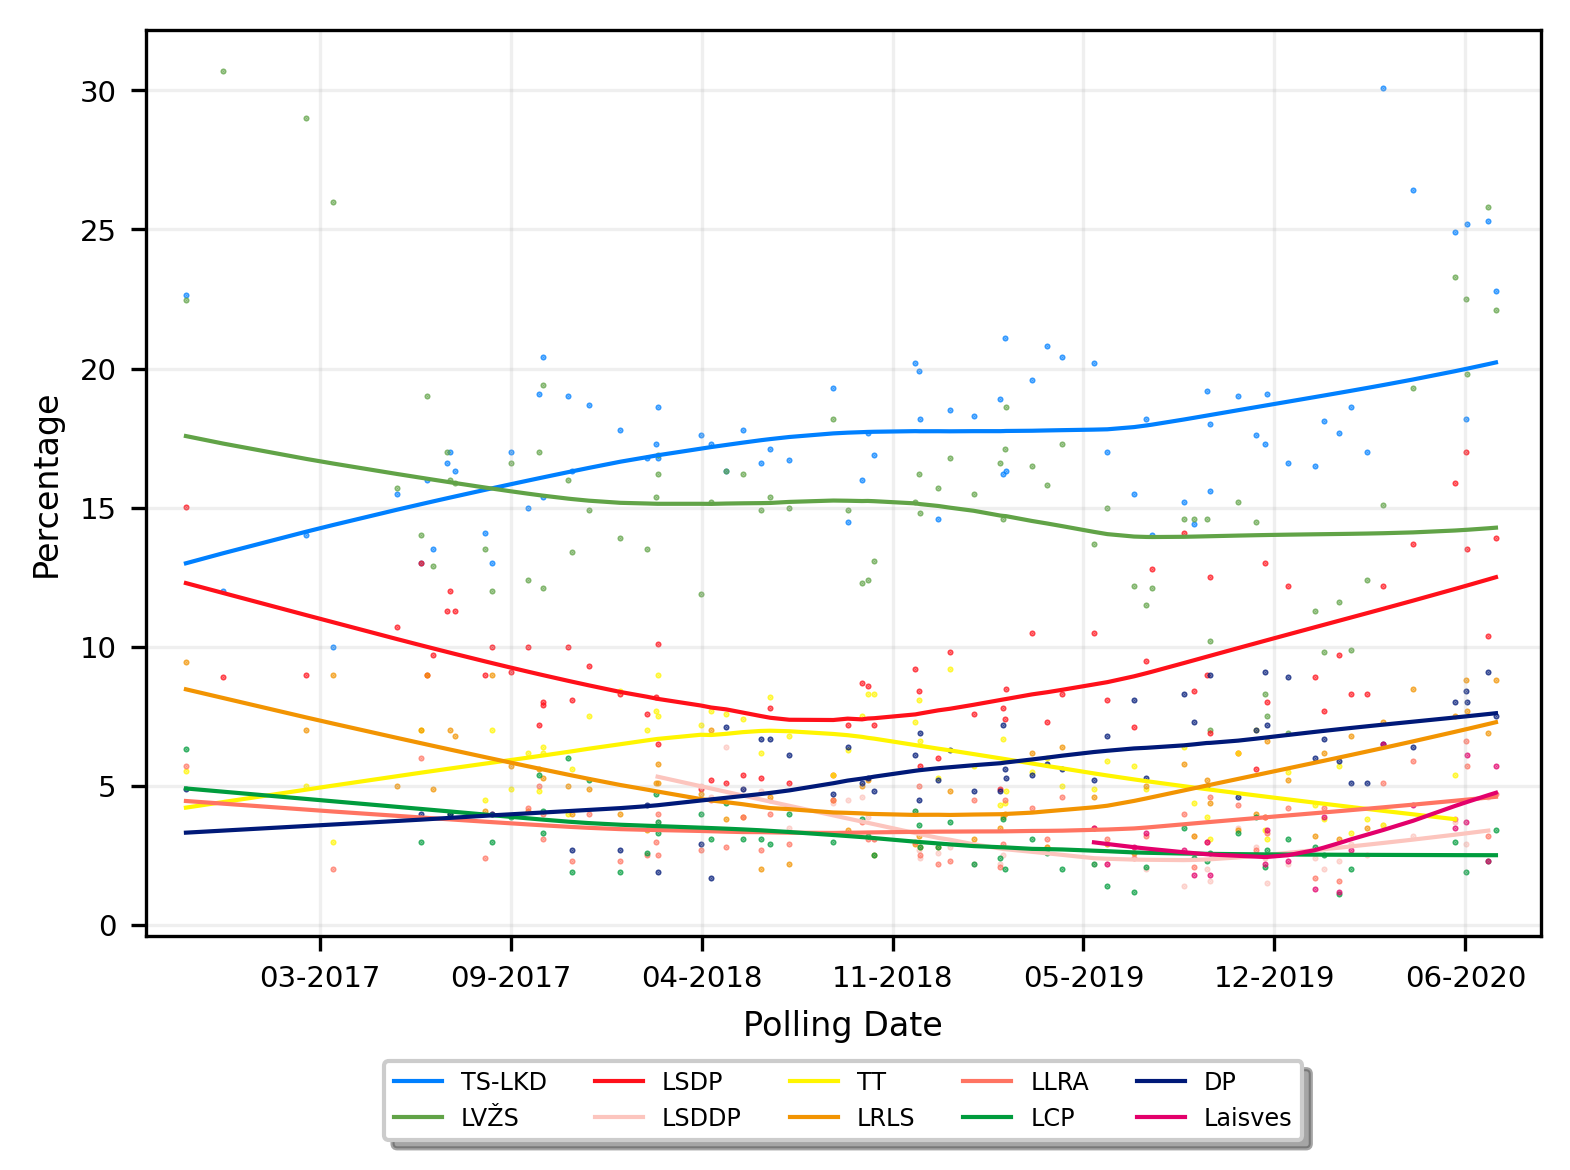

In [20]:
# Add subplot
ax1 = plt.figure().add_subplot()

# Draw scatter plots and LOWESS curves
for col, color in zip(df2.columns[2:], colors):
    sns.regplot(df2['Last dateof polling'].apply(matplotlib.dates.date2num), df2[col], 
                scatter_kws={'s': 0.2, 'color': color}, 
                line_kws={'color': color, 'alpha': 1, 'lw': 1, 'label': col}, 
                lowess=True)

# Name labels and format ticks    
plt.xlabel('Polling Date', fontsize=8); plt.xticks(fontsize=7)
plt.ylabel('Percentage', fontsize=8); plt.yticks(fontsize=7)
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m-%Y'))

# Extend x-limits for some breathing space
ax1.set_xlim(matplotlib.dates.datestr2num('09-2016'), matplotlib.dates.datestr2num('09-2020'))

# Add grid
ax1.grid(alpha=0.2)

# Add legend
box = ax1.get_position()
ax1.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height])
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), fancybox=True, 
           shadow=True, ncol=5, fontsize=5.75)

# Save figure
plt.savefig('LT-1.svg')

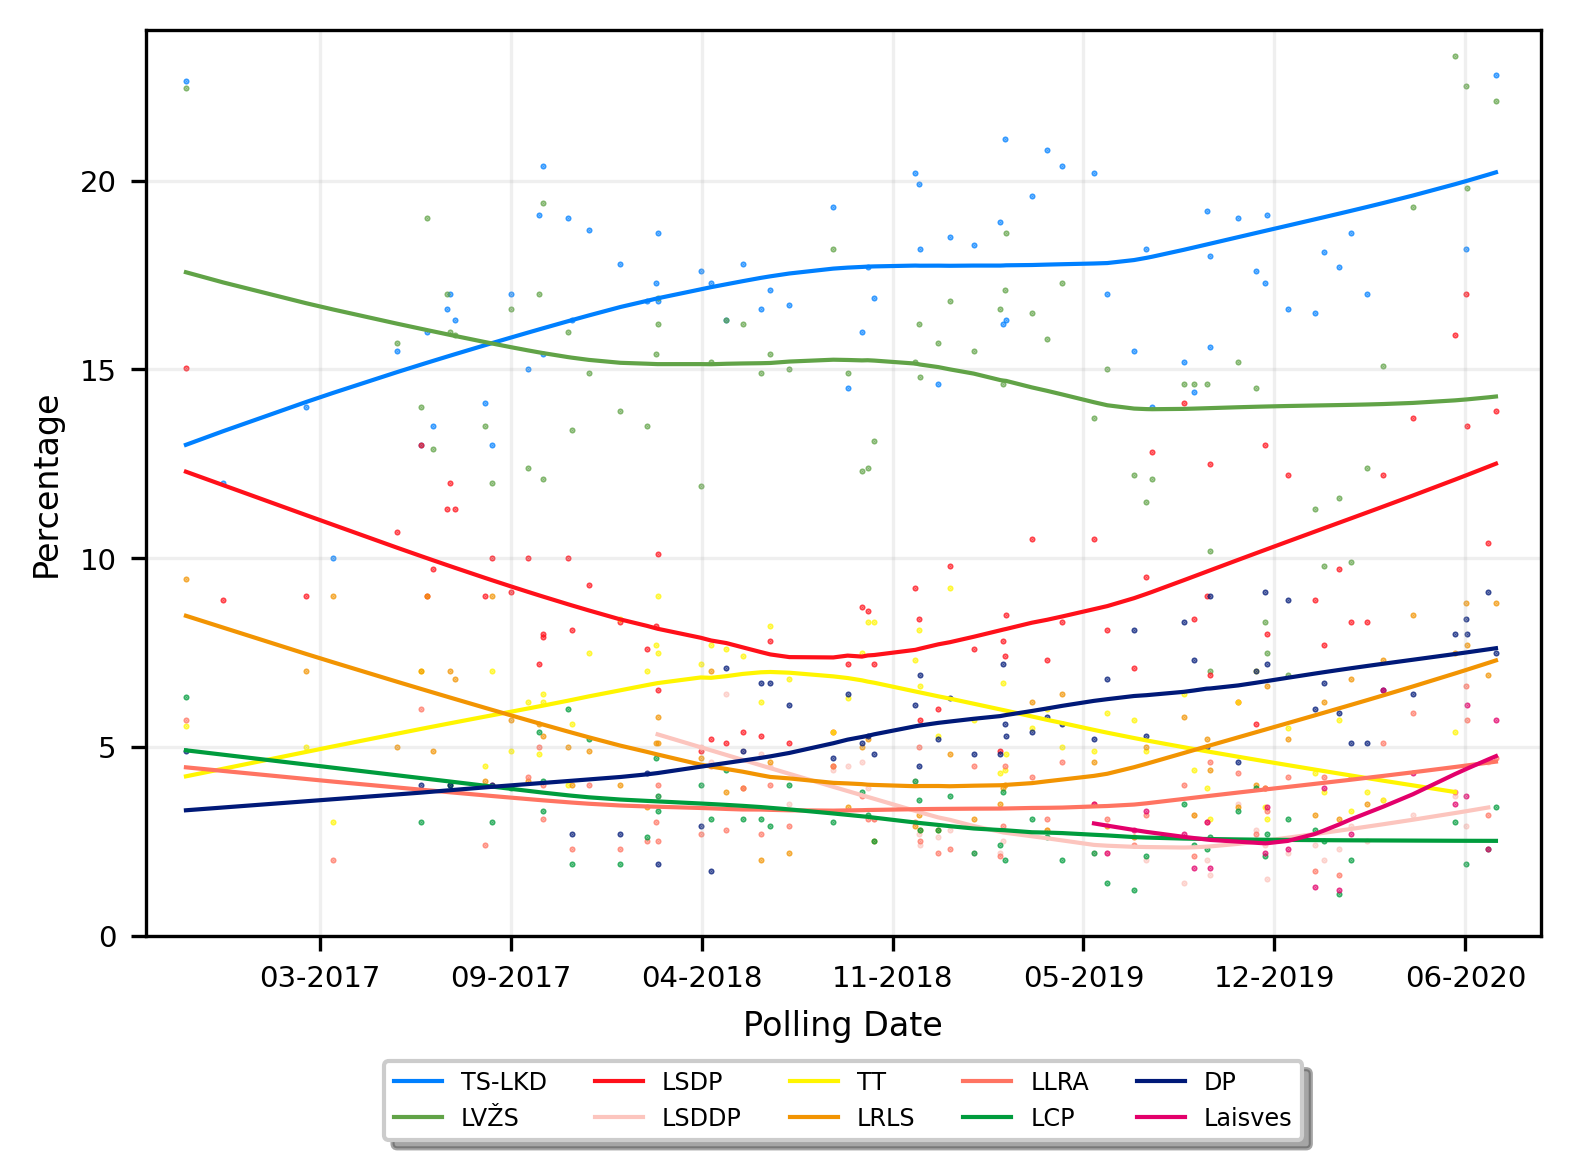

In [21]:
# Add subplot
ax1 = plt.figure().add_subplot()

# Draw scatter plots and LOWESS curves
for col, color in zip(df2.columns[2:], colors):
    sns.regplot(df2['Last dateof polling'].apply(matplotlib.dates.date2num), df2[col], 
                scatter_kws={'s': 0.2, 'color': color}, 
                line_kws={'color': color, 'alpha': 1, 'lw': 1, 'label': col}, 
                lowess=True)

# Name labels and format ticks    
plt.xlabel('Polling Date', fontsize=8); plt.xticks(fontsize=7)
plt.ylabel('Percentage', fontsize=8); plt.yticks(fontsize=7)
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m-%Y'))

# Extend x-limits for some breathing space
ax1.set_xlim(matplotlib.dates.datestr2num('09-2016'), matplotlib.dates.datestr2num('09-2020'))
ax1.set_ylim(0, 24)  # Limit y-axis to have less unused space

# Add grid
ax1.grid(alpha=0.2)

# Add legend
box = ax1.get_position()
ax1.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height])
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), fancybox=True, 
           shadow=True, ncol=5, fontsize=5.75)

# Save figure
plt.savefig('LT-2.svg')

# Ukraine

In [22]:
df3 = pd.read_html('https://en.wikipedia.org/wiki/Opinion_polling_for_the_next_Ukrainian_parliamentary_election')[1]  # Read table
df3.columns = ['Firm', 'Date', 'Сн', 'ОПЗЖ', 'ЄС', 'ВО', 'СіЧ', 'Ляшка́', 'Шарія', 'Голос', 'Свобо́да', 'ГП']  # Fix column names
df3.Date = [pd.to_datetime(date.split(' ')[-1], format='%d.%m.%y') for date in df3.Date]  # Cast to datetime format
df3.replace({'-': np.nan}, inplace=True)  # Replace '-' with NaN
df3

,Firm,Date,Сн,ОПЗЖ,ЄС,ВО,СіЧ,Ляшка́,Шарія,Голос,Свобо́да,ГП
0,Rating,2020-09-03,25.7,16.7,15.6,9.4,4.0,6,3.5,4.3,2.5,0.7
1,Razumkov Centre,2020-08-19,28.5,20.7,14.5,11.5,4.6,2.7,2.2,1.8,2.4,3.8
2,RTS,2020-08-16,25.5,21.1,15.9,7.4,3.1,2.5,5.5,1.3,1.4,3.1
3,SMC,2020-08-15,26.7,21.3,12.5,9.8,4.9,3.3,3.6,1.8,2.3,3.8
4,Rating,2020-08-05,25.9,17.6,15.7,10.4,4.6,4.8,3,2.6,3,1.2
5,RTS,2020-08-03,26.7,21.8,16.7,6.9,3.6,2.5,4.7,1.7,1.9,2.8
6,Rating\IRI,2020-07-31,30.0,17.0,16.0,8.0,2.0,2,2,2.0,2,4
7,Socis,2020-07-28,25.5,18.3,18.1,10.4,6.5,2.8,2.5,2.2,2,1.6
8,IAP,2020-07-26,26.0,21.3,12.8,9.3,3.6,3.6,4.1,1.2,1.9,2.8
9,Rating,2020-07-20,27.8,15.5,14.3,10.0,3.5,4,3.4,2.4,3.3,1.3


In [23]:
# Check data types
df3.dtypes

Firm                object
Date        datetime64[ns]
Сн                 float64
ОПЗЖ               float64
ЄС                 float64
ВО                 float64
СіЧ                float64
Ляшка́              object
Шарія               object
Голос              float64
Свобо́да            object
ГП                  object
dtype: object

In [24]:
# Fix data types
df3[['Ляшка́', 'Шарія', 'Свобо́да', 'ГП']] = df3[['Ляшка́', 'Шарія', 'Свобо́да', 'ГП']].apply(pd.to_numeric)
df3.dtypes

Firm                object
Date        datetime64[ns]
Сн                 float64
ОПЗЖ               float64
ЄС                 float64
ВО                 float64
СіЧ                float64
Ляшка́             float64
Шарія              float64
Голос              float64
Свобо́да           float64
ГП                 float64
dtype: object

In [25]:
# Assign Wikipedia standard colors to each party, in table order
colors = ['#02B240', '#104DA3', '#246CF4', '#ED2136', '#182947', '#F2534C', '#B92619', '#F84716', '#3F73C5', '#FDD900']

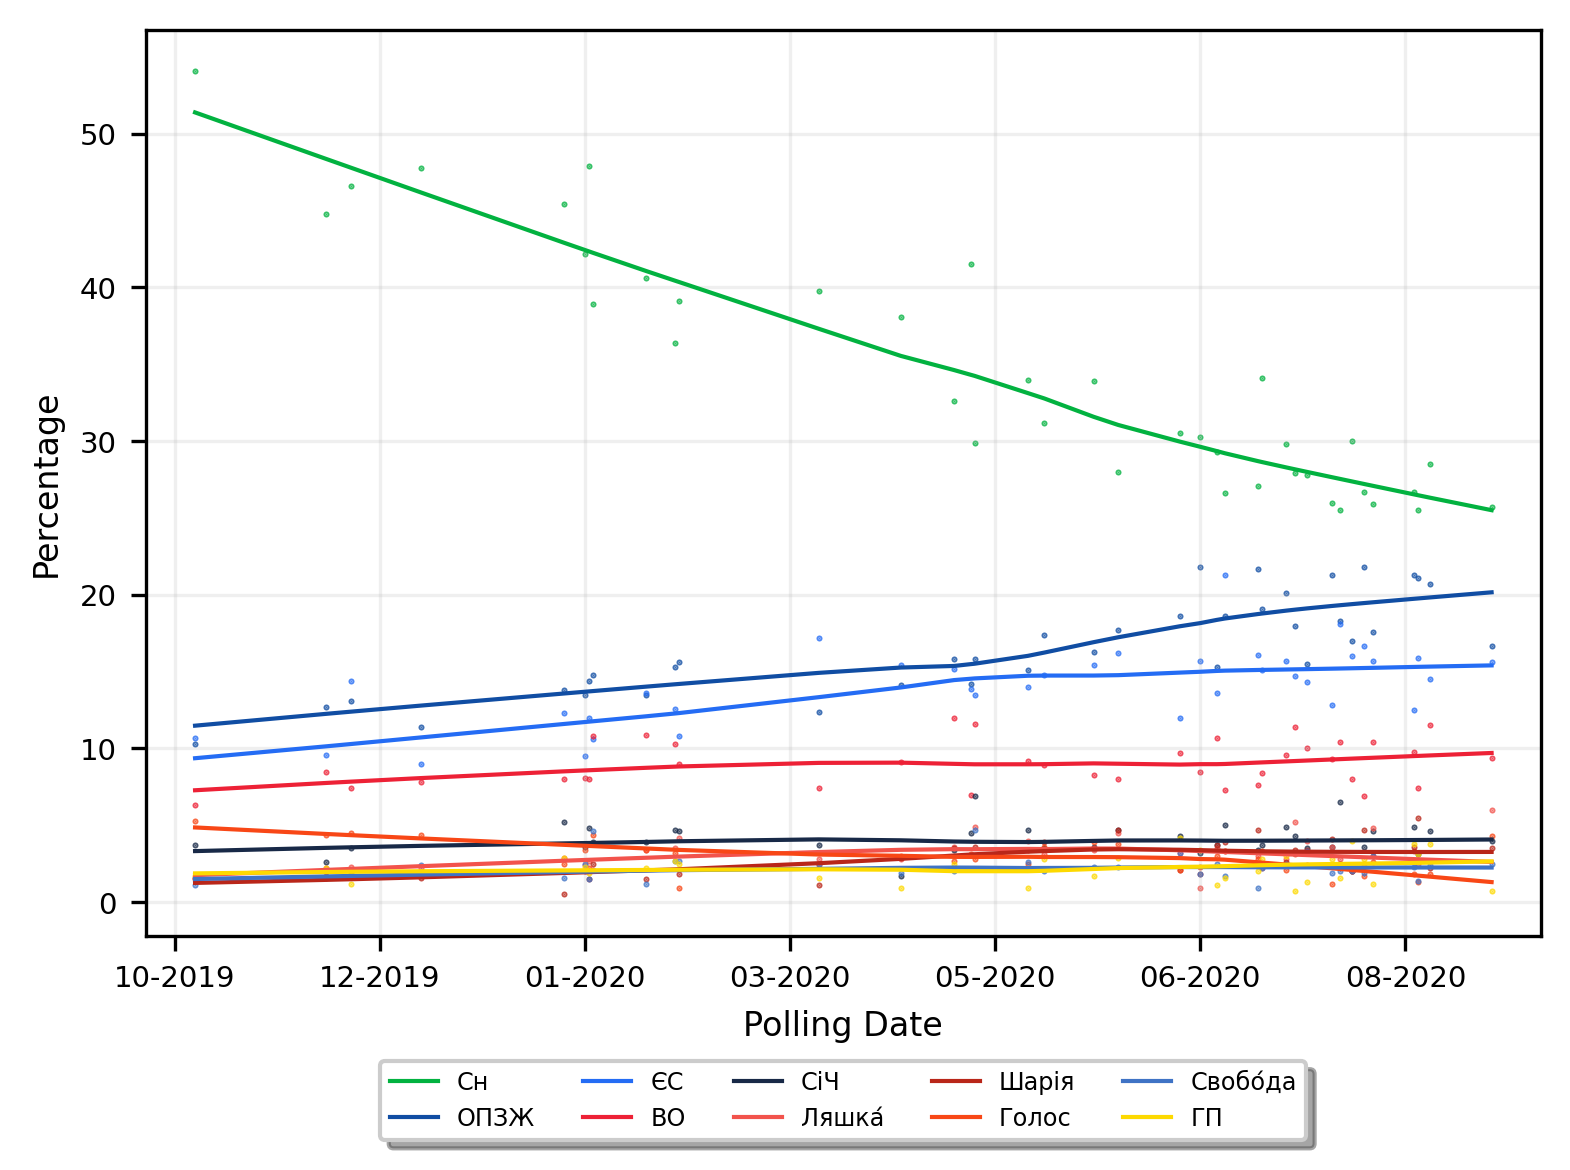

In [26]:
# Add subplot
ax1 = plt.figure().add_subplot()

# Draw scatter plots and LOWESS curves
for col, color in zip(df3.columns[2:], colors):
    sns.regplot(df3['Date'].apply(matplotlib.dates.date2num), df3[col], 
                scatter_kws={'s': 0.2, 'color': color}, 
                line_kws={'color': color, 'alpha': 1, 'lw': 1, 'label': col}, 
                lowess=True)

# Name labels and format ticks    
plt.xlabel('Polling Date', fontsize=8); plt.xticks(fontsize=7)
plt.ylabel('Percentage', fontsize=8); plt.yticks(fontsize=7)
ax1.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%m-%Y'))

# Extend x-limits for some breathing space
ax1.set_xlim(matplotlib.dates.datestr2num('10-2019'), matplotlib.dates.datestr2num('15-09-2020'))

# Add grid
ax1.grid(alpha=0.2)

# Add legend
box = ax1.get_position()
ax1.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height])
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.125), fancybox=True, 
           shadow=True, ncol=5, fontsize=5.75)

# Save figure
plt.savefig('UK-1.svg')